In [4]:
import numpy as np
from urllib.request import urlopen
import urllib
import matplotlib.pyplot as plt # Visuals
import seaborn as sns 
import sklearn as skl
import pandas as pd

from sklearn.cross_validation import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from sklearn.tree import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc 
from sklearn.model_selection import KFold, cross_val_score
from sklearn import cross_validation  
from urllib.request import urlopen 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import plotly.graph_objs as go
import plotly.plotly as py
import plotly.tools as pt
plt.style.use('ggplot')
pt.set_credentials_file(username='jd561996', api_key='NAaKPCM0BgyS5nQjMWqi')

c:\users\jd\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
Cleveland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
Hungarian_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
Switzerland_data_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
np.set_printoptions(threshold=np.nan) #see a whole array when we output it

names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
ClevelandHeartDisease = pd.read_csv(urlopen(Cleveland_data_URL), names = names) #gets Cleveland data
HungarianHeartDisease = pd.read_csv(urlopen(Hungarian_data_URL), names = names) #gets Hungary data
SwitzerlandHeartDisease = pd.read_csv(urlopen(Switzerland_data_URL), names = names) #gets Switzerland data
datatemp = [ClevelandHeartDisease, HungarianHeartDisease, SwitzerlandHeartDisease] #combines all arrays into a list
#heartDisease=pd.read_csv('heart-statlog.csv',names=names)
heartDisease = pd.concat(datatemp)#combines list into one array
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,28,1,2,130,132,0,2,185,0,0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0,?,?,?,0


In [6]:
del heartDisease['ca']
del heartDisease['slope']
del heartDisease['thal']

heartDisease = heartDisease.replace('?', np.nan)
heartDisease.dtypes

age              int64
sex              int64
cp               int64
trestbps        object
chol            object
fbs             object
restecg         object
thalach         object
exang           object
oldpeak         object
heartdisease     int64
dtype: object

In [7]:

count = 0
for item in heartDisease:
    for i in heartDisease[item]:
        count += (i == '?')

In [15]:
def classImbalance(item):
    item_0 = 0
    item_1 = 0
    item_2 = 0
    item_3 = 0
    item_4 = 0
    item_5 = 0
    for item_i in heartDisease[item]:
        for i in range(0,6):
            if (item == i):
                item_i +=1
    heartDisease_i = 0
    for i in  range (0,6):
        heartDisease_i = (item_i/len(heartDisease)) * 100
        print("The percentage of level", i, "in the response variable is: {0:.2f}".format(heartDisease_i)) 

classImbalance('heartdisease')

The percentage of level 0 in the response variable is: 0.18
The percentage of level 1 in the response variable is: 0.18
The percentage of level 2 in the response variable is: 0.18
The percentage of level 3 in the response variable is: 0.18
The percentage of level 4 in the response variable is: 0.18
The percentage of level 5 in the response variable is: 0.18


In [16]:
trace0 = go.Box(
    y=heartDisease['age'],
    name='age'
)
trace1 = go.Box(
    y=heartDisease['sex'],
    name='sex'
)
trace2 = go.Box(
    y=heartDisease['cp'],
    name='cp'
)
trace3 = go.Box(
    y=heartDisease['trestbps'],
    name='trestbps'
)
trace4 = go.Box(
    y=heartDisease['chol'],
    name='chol'
)
trace5 = go.Box(
    y=heartDisease['fbs'],
    name='fbs'
)
trace6 = go.Box(
    y=heartDisease['restecg'],
    name='restecg'
)
trace7 = go.Box(
    y=heartDisease['thalach'],
    name='thalach'
)
trace8 = go.Box(
    y=heartDisease['exang'],
    name='exang'
)
trace9 = go.Box(
    y=heartDisease['oldpeak'],
    name='oldpeak'
)
trace10 = go.Box(
    y=heartDisease['heartdisease'],
    name='heart disease status'
)
plotdata = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]
py.iplot(plotdata)

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [10]:
for item in heartDisease: #converts everything to floats
    heartDisease[item] = pd.to_numeric(heartDisease[item])

def normalize(heartDisease, toNormalize): #normalizes 
    result = heartDisease.copy()
    for item in heartDisease.columns:
        if (item in toNormalize):
            max_value = heartDisease[item].max()
            min_value = heartDisease[item].min()
            result[item] = (heartDisease[item] - min_value) / (max_value - min_value)
    return result
toNormalize = ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak'] #columns to normalize
heartDisease = normalize(heartDisease, toNormalize)
heartDisease = heartDisease.dropna()
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,0.000000,1,0.333333,0.416667,0.218905,0.0,2.0,0.961538,0.0,0.342105,0
1,0.021739,1,0.333333,0.333333,0.402985,0.0,0.0,0.769231,0.0,0.342105,0
3,0.043478,0,0.000000,0.750000,0.393035,0.0,1.0,0.846154,0.0,0.342105,0
4,0.065217,0,0.333333,0.166667,0.363184,0.0,1.0,0.692308,0.0,0.342105,0
5,0.086957,0,0.333333,0.208333,0.328358,0.0,0.0,0.807692,0.0,0.342105,0


In [11]:
for i in range(1,5):
    heartDisease['heartdisease'] = heartDisease['heartdisease'].replace(i,1)

In [12]:
trace0 = go.Box(
    y=heartDisease['age'],
    name='age'
)
trace1 = go.Box(
    y=heartDisease['sex'],
    name='sex'
)
trace2 = go.Box(
    y=heartDisease['cp'],
    name='cp'
)
trace3 = go.Box(
    y=heartDisease['trestbps'],
    name='trestbps'
)
trace4 = go.Box(
    y=heartDisease['chol'],
    name='chol'
)
trace5 = go.Box(
    y=heartDisease['fbs'],
    name='fbs'
)
trace6 = go.Box(
    y=heartDisease['restecg'],
    name='restecg'
)
trace7 = go.Box(
    y=heartDisease['thalach'],
    name='thalach'
)
trace8 = go.Box(
    y=heartDisease['exang'],
    name='exang'
)
trace9 = go.Box(
    y=heartDisease['oldpeak'],
    name='oldpeak'
)
trace10 = go.Box(
    y=heartDisease['heartdisease'],
    name='heart disease status'
)
plotdata = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]
py.iplot(plotdata)

In [3]:
train, test = train_test_split(heartDisease, test_size = 0.20, random_state = 42)
# Create the training test omitting the diagnosis

training_set = train.ix[:, train.columns != 'heartdisease']
# Next we create the class set 
class_set = train.ix[:, train.columns == 'heartdisease']

# Next we create the test set doing the same process as the training set
test_set = test.ix[:, test.columns != 'heartdisease']
test_class_set = test.ix[:, test.columns == 'heartdisease']

NameError: name 'train_test_split' is not defined

In [1]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(train[['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']], train['heartdisease'])
predictions_dt = dt.predict(test[['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']])
predictright = 0
predictions_dt.shape[0]
for i in range(0,predictions_dt.shape[0]-1):
    if (predictions_dt[i]== test.iloc[i][10]):
        predictright +=1
accuracy = predictright/predictions_dt.shape[0]
accuracy

NameError: name 'tree' is not defined

In [2]:
print("Table comparing actual vs. predicted values for our test set:\n",
     confusion_matrix(predictions_dt, test_class_set['heartdisease'])
                 )
print ("Accuracy : ",
    accuracy_score(predictions_dt, test_class_set['heartdisease'])*100)
     
print("Report:",
    pd.crosstab(classification_report(predictions_dt, test_class_set['heartdisease']),rownames=[''],colnames=['']))

NameError: name 'confusion_matrix' is not defined

In [29]:
#ROC curve calculation 
fpr2, tpr2, _ = roc_curve(predictions_dt, test_class_set)

#AUC curve calcuation
auc_dt = auc(fpr2, tpr2)

In [23]:
fitRF = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 500,
                                max_features = 5)
fitRF.fit(training_set, class_set['heartdisease'])
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [24]:
importancesRF = fitRF.feature_importances_
indicesRF = np.argsort(importancesRF)[::-1]
indicesRF

array([2, 8, 9, 4, 7, 0, 3, 1, 6, 5], dtype=int64)

In [25]:
namesInd = names[:11]
print("Feature ranking:")

for f in range(10):
    i = f
    print("%d. The feature '%s' has a Gini Importance of %f" % (f + 1, namesInd[indicesRF[i]], importancesRF[indicesRF[f]]))

Feature ranking:
1. The feature 'cp' has a Gini Importance of 0.195424
2. The feature 'exang' has a Gini Importance of 0.165684
3. The feature 'oldpeak' has a Gini Importance of 0.152049
4. The feature 'chol' has a Gini Importance of 0.143879
5. The feature 'thalach' has a Gini Importance of 0.118047
6. The feature 'age' has a Gini Importance of 0.083195
7. The feature 'trestbps' has a Gini Importance of 0.072504
8. The feature 'sex' has a Gini Importance of 0.035457
9. The feature 'restecg' has a Gini Importance of 0.020557
10. The feature 'fbs' has a Gini Importance of 0.013205


In [26]:
feature_space = []
for i in range(9, -1, -1):
    feature_space.append(namesInd[indicesRF[i]])

c:\users\jd\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.



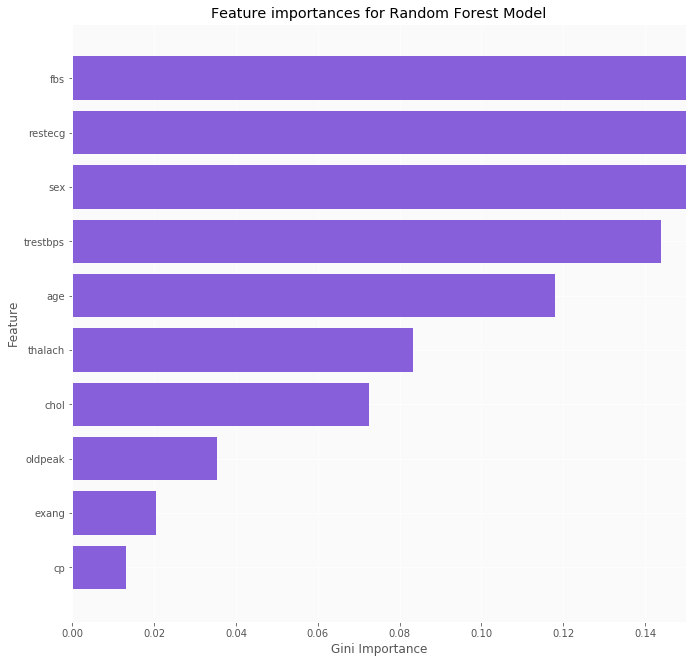

In [27]:
indRf = sorted(importancesRF) #sort into decreasing order 
index = np.arange(10) #arrange the importance

f, ax = plt.subplots(figsize=(11, 11))

ax.set_axis_bgcolor('#fafafa')
plt.title('Feature importances for Random Forest Model')
plt.barh(index, indRf,
        align="center", 
        color = '#875FDB')
plt.yticks(index, ('cp', 'exang', 'oldpeak', 'chol', 'thalach', 'age', 'trestbps', 'sex', 'restecg', 'fbs'))
plt.ylim(-1, 10)
plt.xlim(0, 0.15)
plt.xlabel('Gini Importance')
plt.ylabel('Feature')

plt.show()

In [28]:
predictions_RF = fitRF.predict(test_set)
print(pd.crosstab(predictions_RF, test_class_set['heartdisease'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))

Actual Values      0   1
Predicted Values        
0                 64   4
1                  0  46


In [29]:
accuracy_RF = fitRF.score(test_set, test_class_set['heartdisease'])

print("Here is our mean accuracy on the test set:\n",
     '%.3f' % (accuracy_RF * 100), '%')

Here is our mean accuracy on the test set:
 96.491 %


In [30]:
test_error_rate_RF = 1 - accuracy_RF
print("The test error rate for our model is:\n",
     '%.3f' % (test_error_rate_RF * 100), '%')

The test error rate for our model is:
 3.509 %


In [31]:
#ROC curve calculation
fpr1, tpr1, _ = roc_curve(predictions_RF, test_class_set)
#AUC curve calcuation
auc_rf = auc(fpr1, tpr1)

In [32]:
svmtest = svm.SVC()
svmfit = svmtest.fit(train[['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']], train['heartdisease'])
svmPredictions = svmtest.predict(test[['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']])
predictrightsvm = 0
for i in range(0,svmPredictions.shape[0]-1):
    if (svmPredictions[i]== test.iloc[i][10]):
        predictrightsvm +=1
rightpercentsvm = predictrightsvm/svmPredictions.shape[0]
rightpercentsvm

0.7280701754385965

In [33]:
predictions_svm = svmfit.predict(test_set)
print(pd.crosstab(predictions_svm, test_class_set['heartdisease'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))

Actual Values      0   1
Predicted Values        
0                 54  20
1                 10  30


In [34]:
#ROC curve calculation
fpr4, tpr4, _ = roc_curve(predictions_svm, test_class_set)
#AUC curve calcuation
auc_svm = auc(fpr4, tpr4)

In [35]:
heartDiseaseKnn = KNeighborsClassifier(n_neighbors=10)
heartDiseaseKnn.fit(training_set, class_set['heartdisease'])
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [36]:
# We predict the class for our training set
predictionsTrain = heartDiseaseKnn.predict(training_set) 

# Here we create a matrix comparing the actual values vs. the predicted values
print(pd.crosstab(predictionsTrain, class_set['heartdisease'], 
                  rownames=['Predicted Values'], colnames=['Actual Values']))

# Measure the accuracy based on the trianing set
accuracyTrain = heartDiseaseKnn.score(training_set, class_set['heartdisease'])

print("Here is our accuracy for our training set:")
print('%.3f' % (accuracyTrain * 100), '%')

Actual Values       0    1
Predicted Values          
0                 246   69
1                  17  122
Here is our accuracy for our training set:
81.057 %


In [37]:
print("The train error rate for our model is:")
train_error_rate = 1 - accuracyTrain  
print('%.3f' % (train_error_rate * 100), '%')

The train error rate for our model is:
18.943 %


In [38]:
# First we predict the Dx for the test set and call it predictions
predictions = heartDiseaseKnn.predict(test_set)

# Let's compare the predictions vs. the actual values
print(pd.crosstab(predictions, test_class_set['heartdisease'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))

# Let's get the accuracy of our test set
accuracy = heartDiseaseKnn.score(test_set, test_class_set['heartdisease'])

# TEST ERROR RATE!!
print("Here is our accuracy for our test set:")
print('%.3f' % (accuracy * 100), '%')

Actual Values      0   1
Predicted Values        
0                 55  21
1                  9  29
Here is our accuracy for our test set:
73.684 %


In [40]:
n = KFold(n_splits=3)

scores = cross_val_score(heartDiseaseKnn, 
                         test_set, 
                         test_class_set['heartdisease'], cv = n)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))

fpr3, tpr3, _ = roc_curve(predictions, test_class_set)
auc_knn = auc(fpr3, tpr3)

Accuracy: 0.75 (+/- 0.03)


c:\users\jd\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning:

The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.



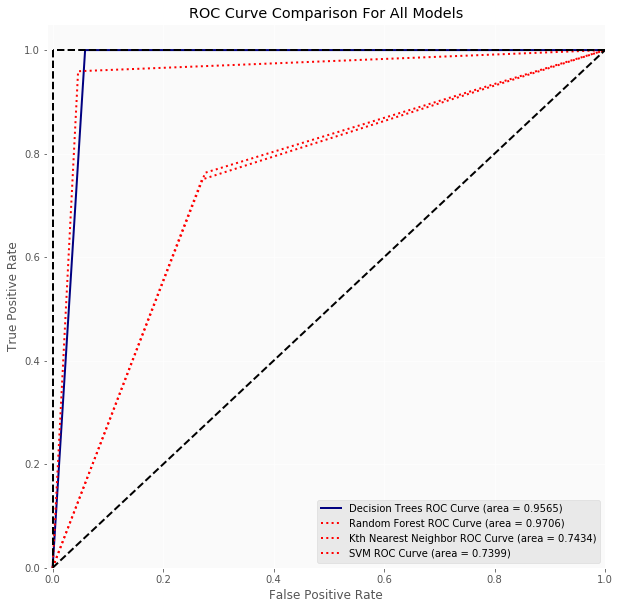

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(fpr1, tpr1,label='Decision Trees ROC Curve (area = %.4f)' % auc_dt, 
         color = 'navy', 
         linewidth=2)
plt.plot(fpr2, tpr2,label='Random Forest ROC Curve (area = %.4f)' % auc_rf, 
         color = 'red', 
         linestyle=':', 
         linewidth=2)
plt.plot(fpr3, tpr3,label='Kth Nearest Neighbor ROC Curve (area = %.4f)' % auc_knn, 
         color = 'red', 
         linestyle=':', 
         linewidth=2)
plt.plot(fpr4, tpr4,label='SVM ROC Curve (area = %.4f)' % auc_svm, 
         color = 'red', 
         linestyle=':', 
         linewidth=2)

ax.set_axis_bgcolor('#fafafa')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison For All Models')
plt.legend(loc="lower right")

plt.show()